Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: fl

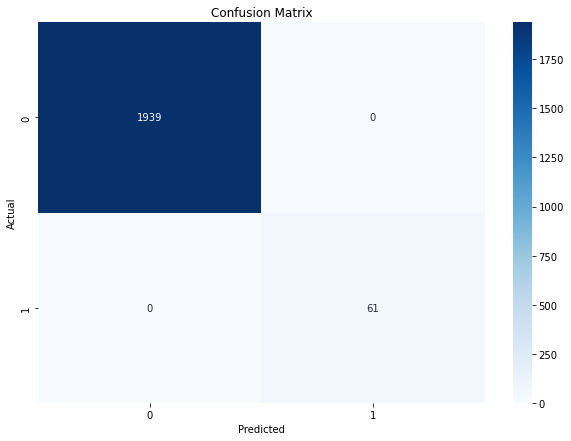

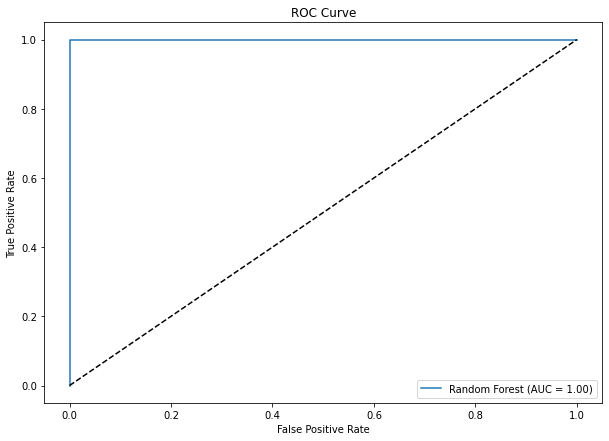

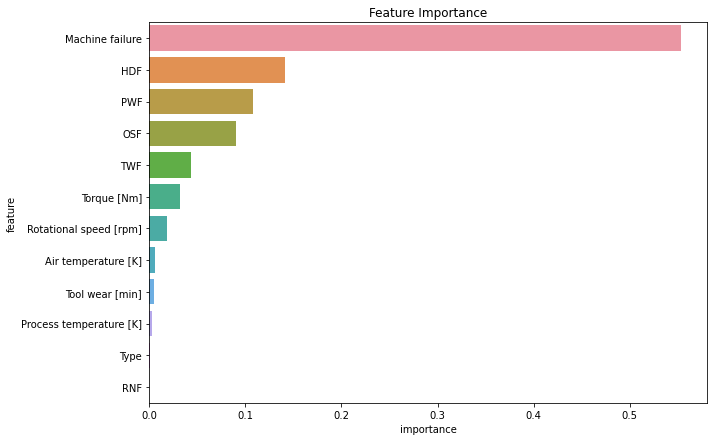

Model has been saved as 'Model.pkl'.


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

def load_data(file_name):
    data = pd.read_csv(file_name)
    print("Data Information:")
    print(data.info())
    print("\nData Statistical Description:")
    print(data.describe())
    print("\nData Correlation:")
    print(data.corr())
    return data

def preprocess_data(data):
    numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())
    data['Type'] = data['Type'].map({'L': 0, 'M': 1, 'H': 2})
    features = ['Type'] + numeric_features + ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    X = data[features]
    y = data['Machine failure']
    return X, y

def train_test_split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(X_train_scaled, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    return model

def evaluate_model(model, X_test_scaled, y_test, X_test):
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC Score:", roc_auc)
    plot_confusion_matrix(conf_matrix)
    plot_roc_curve(model, X_test_scaled, y_test)
    plot_feature_importance(model, X_test.columns)

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(model, X_test_scaled, y_test):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

def plot_feature_importance(model, feature_names):
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': model.feature_importances_})
    plt.figure(figsize=(10, 7))
    sns.barplot(x='importance', y='feature', data=feature_importance.sort_values('importance', ascending=False))
    plt.title('Feature Importance')
    plt.show()

def main():
    data = load_data('ai4i2020.csv')
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = train_test_split_data(X, y)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    model = train_model(X_train_scaled, y_train)
    evaluate_model(model, X_test_scaled, y_test, X_test)
    joblib.dump(model, 'Model.pkl')
    print("Model has been saved as 'Model.pkl'.")

if __name__ == "__main__":
    main()
